In [404]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

### EDA and Cleaning

In [363]:
df = pd.read_csv("heart_data.csv")

In [364]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [366]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: >

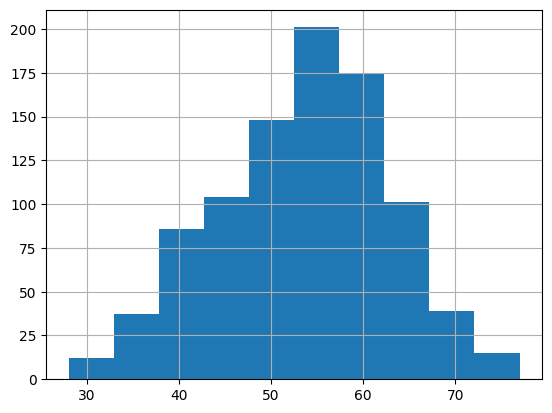

In [367]:
# Distribution of Age
df.Age.hist()

<Axes: ylabel='Age'>

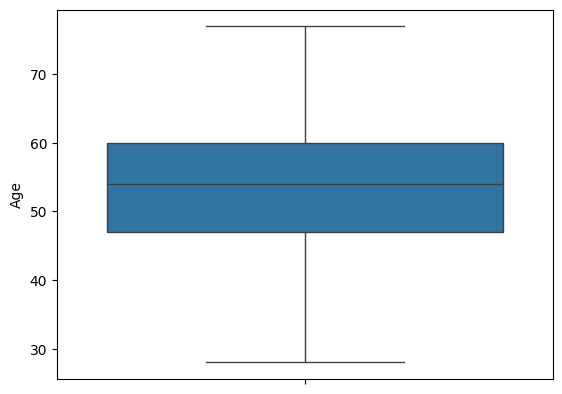

In [368]:
plt.figure()
sns.boxplot(data=df.Age)

In [369]:
# As we see ages are between 28 and 77, and the most common are those between 45 and 60

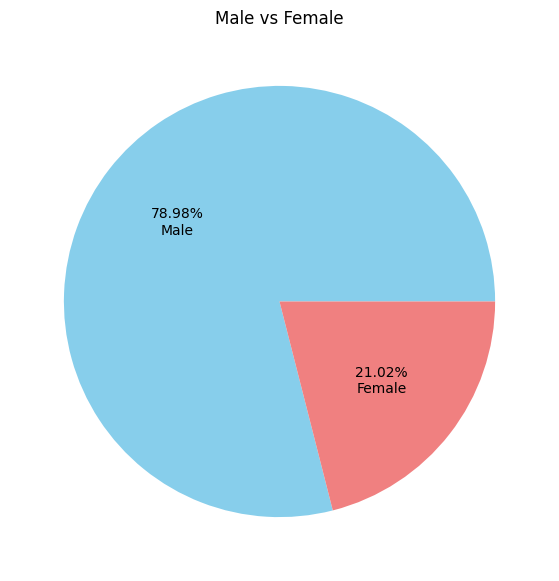

In [370]:
# Now we will see Genders
plt.figure(figsize=(8, 7))
plt.pie(df.Sex.value_counts(), autopct=lambda pct: f"{round(pct, 2)}%" + "\nMale" if pct > 50 else f"{round(pct, 2)}%" + "\nFemale", colors=['skyblue', 'lightcoral'])
plt.title("Male vs Female")
plt.show()

In [371]:
# We can see that the dataset is skewed towards males, with a significately higher proportion compared to females

In [372]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


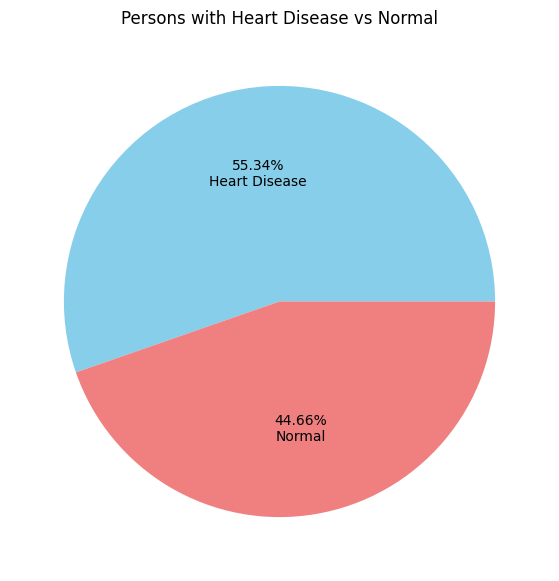

In [373]:
# Persons with Heart Disease
plt.figure(figsize=(8, 7))
plt.pie(df.HeartDisease.value_counts(), autopct=lambda pct: f"{round(pct, 2)}%" + "\nHeart Disease" if pct > 50 else f"{round(pct, 2)}%" + "\nNormal", colors=['skyblue', 'lightcoral'])
plt.title("Persons with Heart Disease vs Normal")
plt.show()

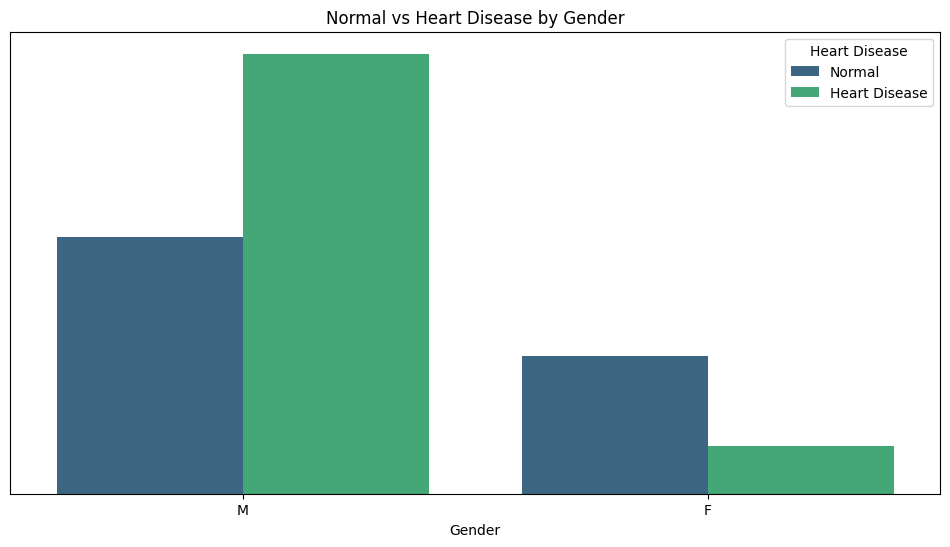

In [374]:
#We compare genders
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='viridis')
plt.xlabel('Gender')
plt.ylabel("")
plt.title('Normal vs Heart Disease by Gender')
plt.legend(title='Heart Disease', loc='upper right', labels=['Normal', 'Heart Disease'])
plt.yticks([])
plt.show()

In [375]:
# For Males, the number of persons with heart disease greater than those Normal. The opposite for Females
# But We have to remeber that 78% are males, which means this chart is not really coherent

In [376]:
#Sick or Normal By Age
df2 = df.copy()
df2["Age"] = df2["Age"].apply(lambda x: "28 - 40" if x < 40 else "40 - 50" if 40 <= x < 50 else "50 - 60" if 50 <= x < 60 else "60 - 70" if 60 <= x < 70 else "70 - 80")

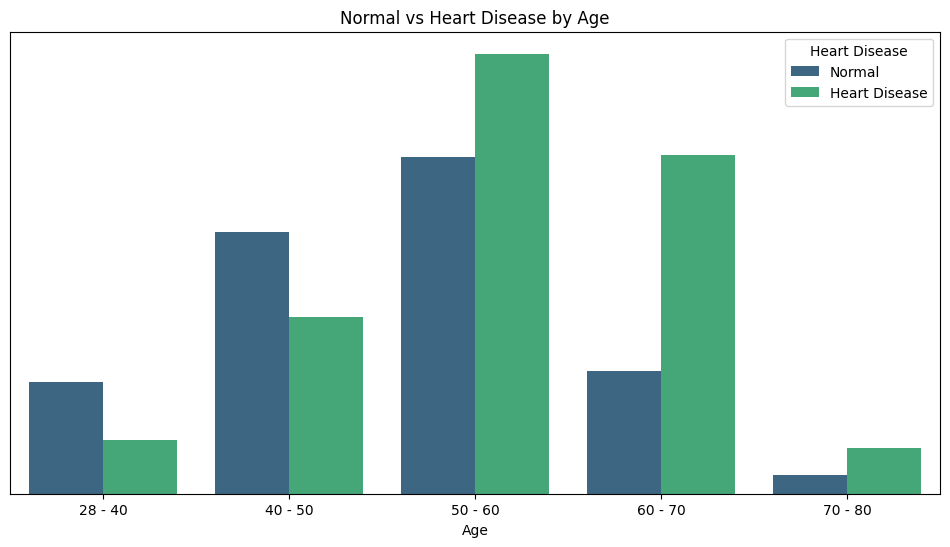

In [377]:
age_order = ["28 - 40", "40 - 50", "50 - 60", "60 - 70", "70 - 80"]

plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Age', hue='HeartDisease', palette='viridis', order=age_order)
plt.xlabel('Age')
plt.ylabel("")
plt.title('Normal vs Heart Disease by Age')
plt.legend(title='Heart Disease', loc='upper right', labels=['Normal', 'Heart Disease'])
plt.yticks([])
plt.show()

In [378]:
# Individuals aged 50 and above are more likely to have heart disease compared to younger individuals
# And this is due to many factors such as: accumulated exposure to risk factors, changes in cardiovascular structure and function, and the natural aging process of the body

In [379]:
# Chest Pain Type Distribution
# Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

C:\Users\elybo\AppData\Local\Temp\ipykernel_9676\805661092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chest_pain_type.index, y=chest_pain_type, palette="viridis")


Text(0.5, 1.0, 'Chest Pain Types')

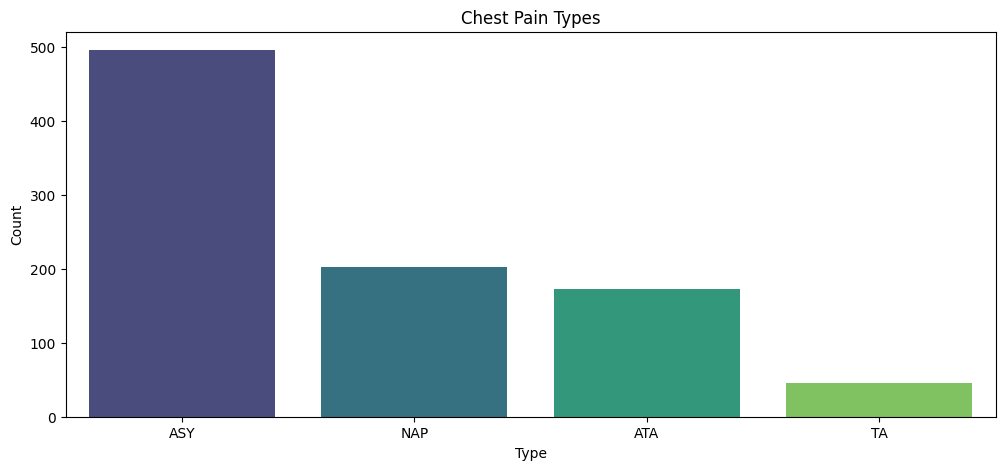

In [380]:
chest_pain_type = df["ChestPainType"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=chest_pain_type.index, y=chest_pain_type, palette="viridis")
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Chest Pain Types')

In [381]:
# RestingECG
# esting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
# LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

C:\Users\elybo\AppData\Local\Temp\ipykernel_9676\2021185898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chest_pain_type.index, y=chest_pain_type, palette="viridis")


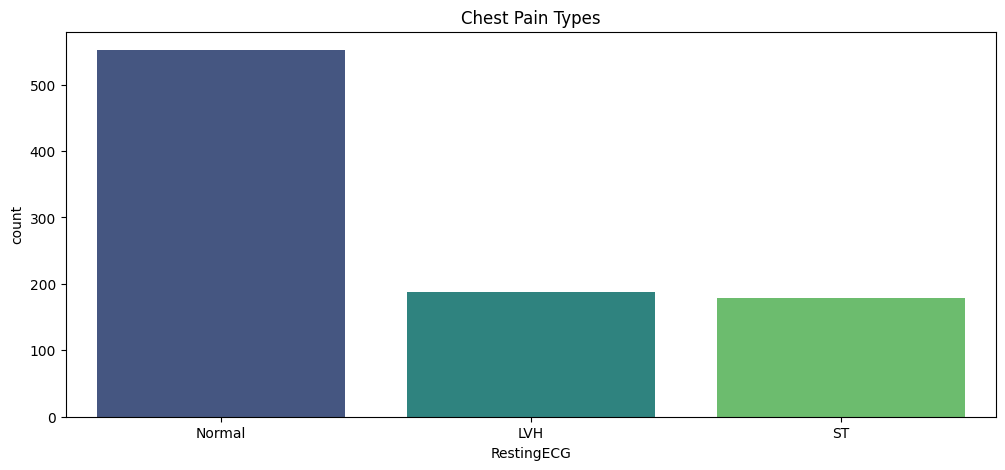

In [382]:
chest_pain_type = df["RestingECG"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=chest_pain_type.index, y=chest_pain_type, palette="viridis")
plt.title('Chest Pain Types')
plt.show()

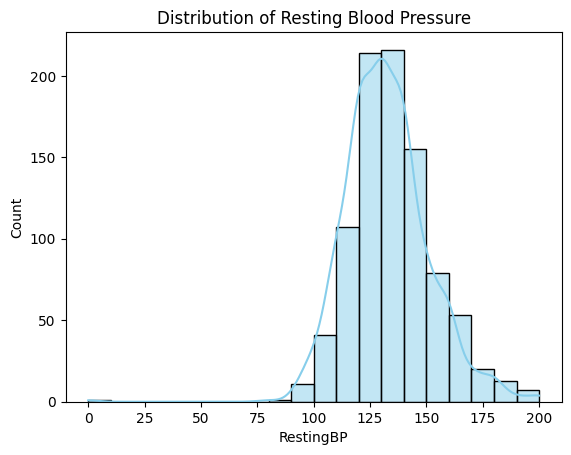

In [383]:
# Resting Blood Pressure Distribution
sns.histplot(data=df, x="RestingBP", kde=True, color="skyblue", bins=20)

plt.title("Distribution of Resting Blood Pressure")
plt.show()

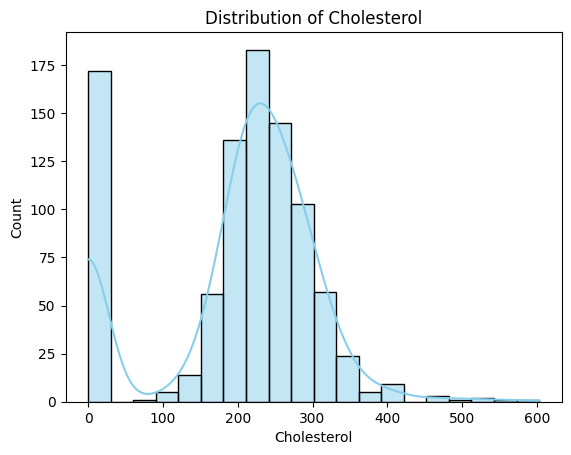

In [384]:
# Cholesterol Distribution
sns.histplot(data=df, x="Cholesterol", kde=True, color="skyblue", bins=20)

plt.title("Distribution of Cholesterol")
plt.show()

In [385]:
# We Notice that we have many indviduals with cholesterol almost 0
# So I will replace where cholesterol == 0 with the mean

In [386]:
# Get the mean 
mean_cholestrerol = df["Cholesterol"].mean()

# Replace the 0 vales by the mean
df["Cholesterol"] = df["Cholesterol"].apply(lambda x: mean_cholestrerol if x == 0 else x)

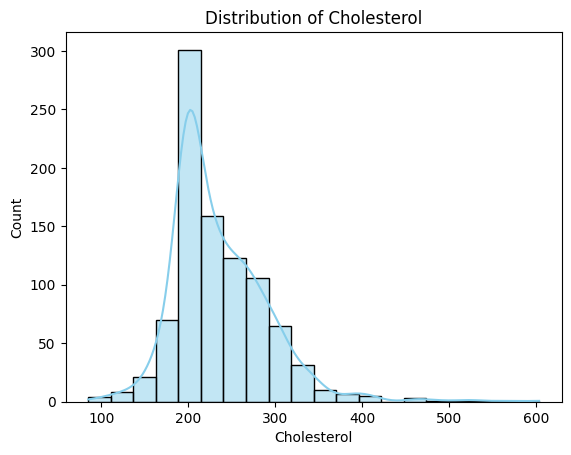

In [387]:
# We plot Again
sns.histplot(data=df, x="Cholesterol", kde=True, color="skyblue", bins=20)

plt.title("Distribution of Cholesterol")
plt.show()

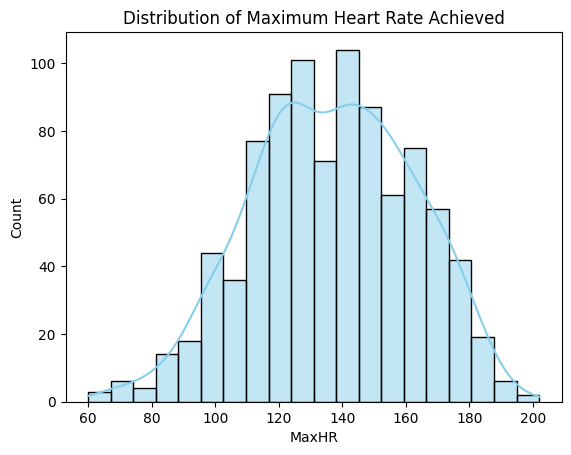

In [388]:
# maximum heart rate achieved Distribution
sns.histplot(data=df, x="MaxHR", kde=True, color="skyblue", bins=20)

plt.title("Distribution of Maximum Heart Rate Achieved")
plt.show()

### Model and Predition

In [389]:
# Get Features and Target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"].to_numpy()

In [390]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Select Numerical Columns
numerical_cols = X.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('FastingBS')

# Scale
scaler = MinMaxScaler()
scaled_cols = scaler.fit_transform(X[numerical_cols])

X[numerical_cols] = scaled_cols

In [391]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,M,ATA,0.70,0.393822,0,Normal,0.788732,N,0.295455,Up
1,0.428571,F,NAP,0.80,0.183398,0,Normal,0.676056,N,0.409091,Flat
2,0.183673,M,ATA,0.65,0.382239,0,ST,0.267606,N,0.295455,Up
3,0.408163,F,ASY,0.69,0.249035,0,Normal,0.338028,Y,0.465909,Flat
4,0.530612,M,NAP,0.75,0.212355,0,Normal,0.436620,N,0.295455,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,M,TA,0.55,0.345560,0,Normal,0.507042,N,0.431818,Flat
914,0.816327,M,ASY,0.72,0.208494,1,Normal,0.570423,N,0.681818,Flat
915,0.591837,M,ASY,0.65,0.088803,0,Normal,0.387324,Y,0.431818,Flat
916,0.591837,F,ATA,0.65,0.291506,0,LVH,0.802817,N,0.295455,Flat


In [392]:
# Categorical cols
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = list(categorical_cols)
categorical_cols.append("FastingBS")
categorical_cols

['Sex',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'FastingBS']

In [393]:
df_dummies = pd.get_dummies(X[categorical_cols]).astype(int)

# Concatenate the original numerical column with the dummy columns
X_final = pd.concat([X[numerical_cols], df_dummies], axis=1)

In [394]:
X_final

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.393822,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.183398,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.382239,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.249035,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.212355,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.345560,0.507042,0.431818,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0.816327,0.72,0.208494,0.570423,0.681818,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0.591837,0.65,0.088803,0.387324,0.431818,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,0.591837,0.65,0.291506,0.802817,0.295455,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [399]:
# Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=2)

In [412]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [407]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [413]:
def accuracy(model):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [408]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8678967477401919
Best Parameters: {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [416]:
print(f"Accuracy : {accuracy(best_clf_lr)}")

Accuracy : 0.8641304347826086


In [409]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8515422607399123
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [417]:
print(f"Accuracy : {accuracy(best_clf_knn)}")

Accuracy : 0.8532608695652174


In [410]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8570030752026838
Best Parameters: {'C': 100, 'kernel': 'linear'}


In [418]:
print(f"Accuracy : {accuracy(best_clf_svc)}")

Accuracy : 0.8586956521739131


In [411]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\elybo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\elybo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\elybo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

Random Forest
Best Score: 0.871978380393253
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}


In [419]:
print(f"Accuracy : {accuracy(best_clf_rf)}")

Accuracy : 0.8532608695652174


In [420]:
# All the models I tried are almost around 0.85 and 0.86 on the test data
# And Logistic Regression seems to be the best model both on the train and test data (generalization)

In [426]:
# Now We Will use some Neural Netwoks with tenserflow
import tensorflow as tf

In [427]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'), # Input layer with 64 neurons and ReLU activation function
    tf.keras.layers.Dense(64, activation='relu'), # Hidden layer with 64 neurons and ReLU activation function
    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer with 1 neuron and sigmoid activation function
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [429]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

Epoch 1/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8733
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8678
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8774
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8706
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8760
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.8774
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8787
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8774
Epoch 9/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8801
Epoch 10/10
6/6 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8641
Test accuracy: 0.8641

In [430]:
# We have 0.864 accuracy on test data with the neural network